In [1]:
# 1. Imports and Data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

Dataset shape: (178, 13)

Feature distributions:


<Figure size 640x480 with 0 Axes>

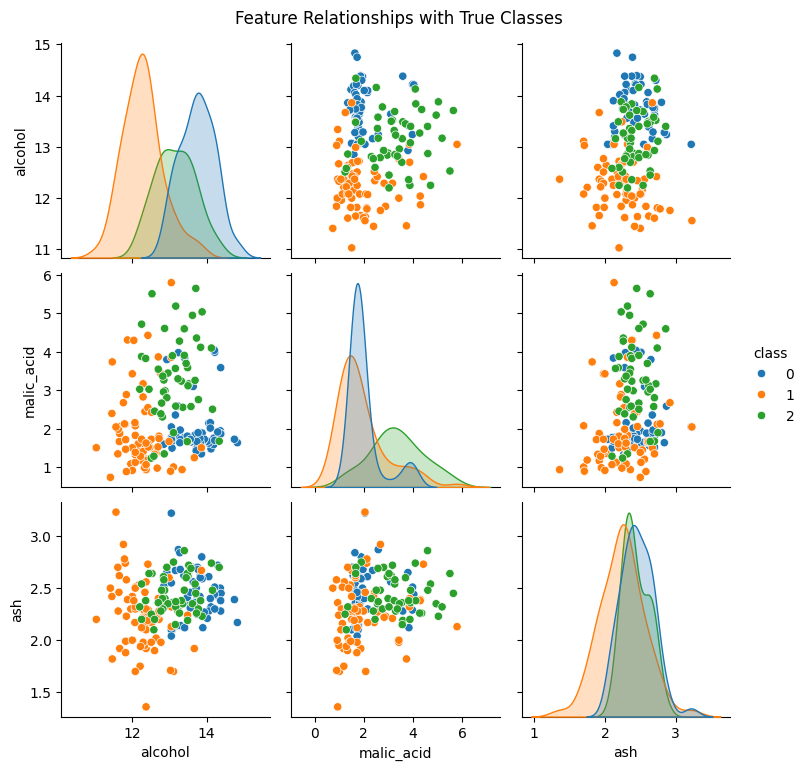

In [2]:
# 2. Data Exploration
# Explore the Wine dataset characteristics

# Create DataFrame for exploration
df_wine = pd.DataFrame(X, columns=feature_names)
df_wine['class'] = y

# Basic dataset stats
print("Dataset shape:", X.shape)
print("\nFeature distributions:")
df_wine.describe()

# Pairplot of 3 key features for visualization
plt.figure()
sns.pairplot(df_wine[['alcohol', 'malic_acid', 'ash', 'class']], hue='class', palette='tab10')
plt.suptitle("Feature Relationships with True Classes", y=1.02)
plt.show()

In [3]:
# 3. Data Preprocessing
# Standardize features for distance-based clustering

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# No train/test split - hierarchical clustering typically applied to full dataset

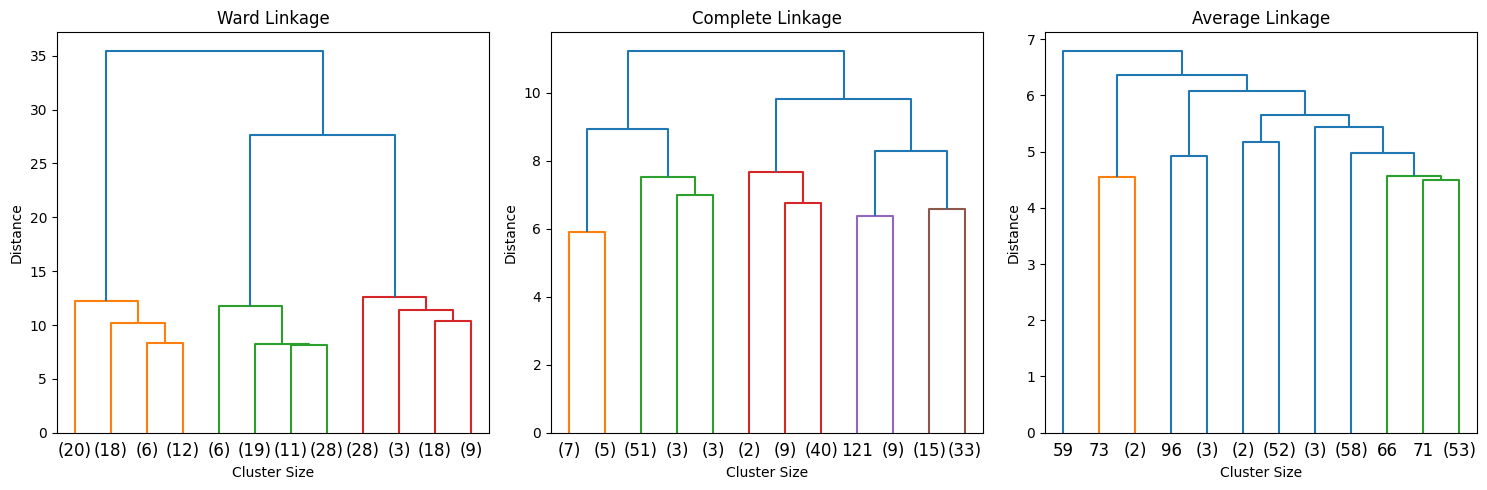

In [4]:
# 4. Linkage Methods Comparison
# Create dendrograms for different linkage methods

# Calculate linkages for different methods
linkage_methods = ['ward', 'complete', 'average']
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, truncate_mode='lastp', p=12)
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

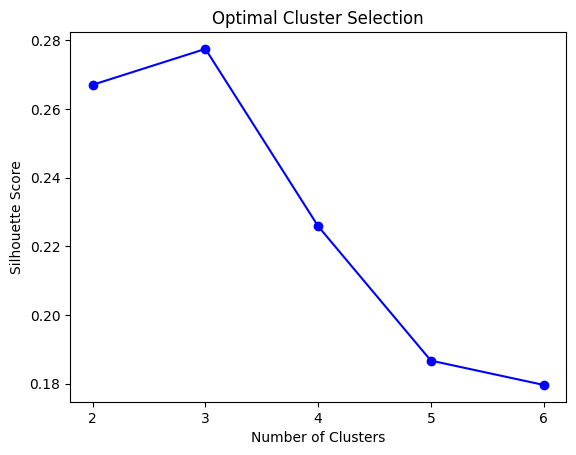

In [5]:
# 5. Optimal Cluster Determination
# Using silhouette scores across different cluster numbers

# Test different cluster numbers
cluster_range = range(2, 7)
silhouette_scores = []

for n in cluster_range:
    # Ward is most common linkage for hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = model.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot results
plt.figure()
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Cluster Selection')
plt.xticks(cluster_range)
plt.show()

In [6]:
# 6. Final Model Training

best_n_clusters = 3  # Known ground truth for wine dataset
best_linkage = 'ward'

# Create and fit final model
final_hc = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage
)
hc_labels = final_hc.fit_predict(X_scaled)

Silhouette Score: 0.277
Adjusted Rand Index: 0.790


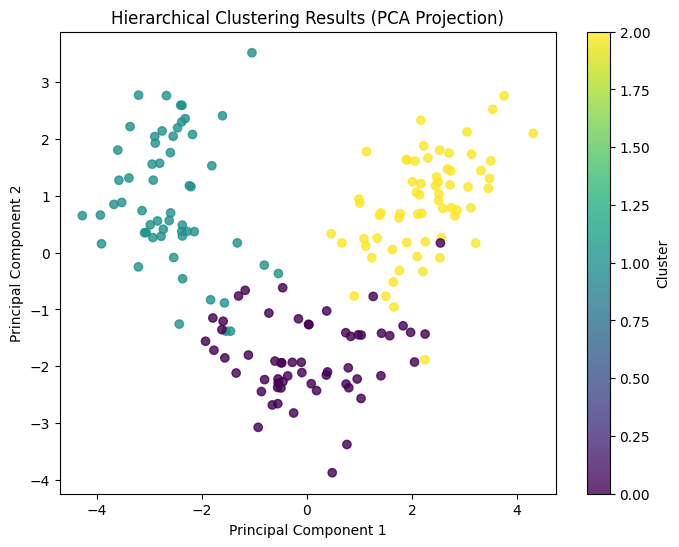

In [7]:
#7. Evaluation & Visualization
# Assess clustering quality and visualize results

# Calculate metrics
sil_score = silhouette_score(X_scaled, hc_labels)
ari_score = adjusted_rand_score(y, hc_labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Adjusted Rand Index: {ari_score:.3f}")

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering Results (PCA Projection)')
plt.colorbar(label='Cluster')
plt.show()